In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
ds = xr.open_dataset('/data/sallen/results/MIDOSS/Lagrangian_AKNS_crude_15jan18-22jan18_AKNS.nc')
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
hdf = h5py.File('/data/sallen/results/MIDOSS/Lagrangian_AKNS_crude_15jan18-22jan18_AKNS.hdf5', 'r')

In [3]:
ds

<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_x_latlon: 397, grid_y: 896, grid_y_latlon: 897, grid_z: 40, time: 191)
Coordinates:
  * time                 (time) datetime64[ns] 2018-01-15T00:30:00 ... 2018-01-22T22:30:00
  * grid_y               (grid_y) int16 0 1 2 3 4 5 ... 890 891 892 893 894 895
  * grid_x               (grid_x) int16 0 1 2 3 4 5 ... 390 391 392 393 394 395
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
  * grid_y_latlon        (grid_y_latlon) float32 0.0 1.0 2.0 ... 895.0 896.0
  * grid_x_latlon        (grid_x_latlon) float32 0.0 1.0 2.0 ... 395.0 396.0
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Latitude             (grid_y_latlon, grid_x_latlon) float64 ...
    Longitude            (grid_y_latlon, grid_x_latlon) float64 ...
    Beaching_Time        (grid_y, grid_x) datetime64[ns] ...
    Beaching_Volume      (grid_y, grid_x) datetime64[ns] ...
    Oil_Arrival_Time     (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Thu Jul  9 21:44:38 2020: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    history_of_appended_files:  Thu Jul  9 21:44:38 2020: Appended file /loca...

In [132]:
imin, imax = 250, 340
jmin, jmax = 180, 280

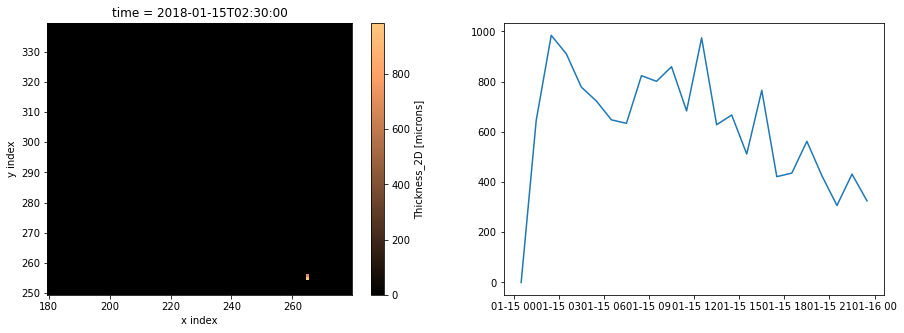

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 2
ds.Thickness_2D[it, imin:imax, jmin:jmax].plot(ax=axs[0], cmap='copper')
axs[1].plot(ds.time[0:24], ds.Thickness_2D[0:24].max(axis=1).max(axis=1));

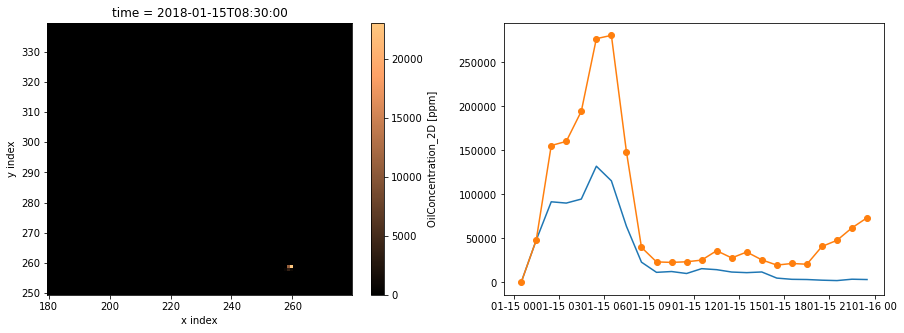

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 8
ds.OilConcentration_2D[it, imin:imax, jmin:jmax].plot(ax=axs[0], cmap='copper')
axs[1].plot(ds.time[0:24], ds.OilConcentration_2D[0:24].max(axis=1).max(axis=1));
axs[1].plot(ds.time[0:24], ds.OilConcentration_2D[0:24].sum(axis=1).sum(axis=1), 'o-');

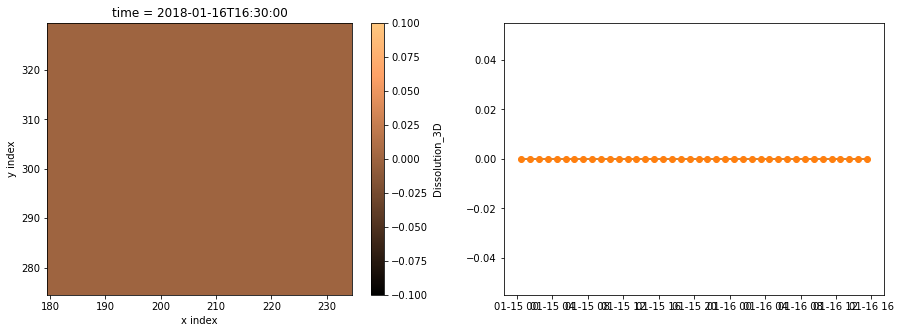

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 40
ds.Dissolution_3D[it, :, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0], cmap='copper')
axs[1].plot(ds.time[0:it], ds.Dissolution_3D[0:it].max(axis=1).max(axis=1).max(axis=1));
axs[1].plot(ds.time[0:it], ds.Dissolution_3D[0:it].sum(axis=1).sum(axis=1).sum(axis=1), 'o-');

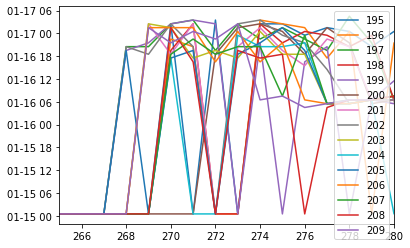

In [43]:
fig, ax = plt.subplots(1, 1)
for j in range(jmin, jmax-40):
    plt.plot(ds.Oil_Arrival_Time[:, j], label=str(j));
ax.set_xlim(imin+20, imax-20)
ax.legend();

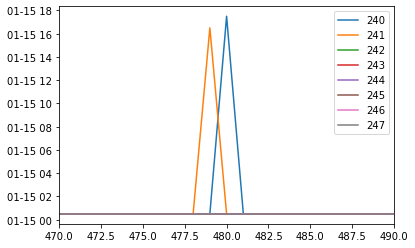

In [78]:
fig, ax = plt.subplots(1, 1)
for j in range(240, 248):
    plt.plot(ds.Beaching_Time[:, j], label=str(j));
ax.set_xlim(470, 490)
ax.legend();

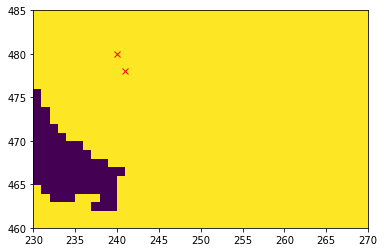

In [82]:
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.tmask[0, 0])
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
ax.plot([240, 241], [480, 478], 'rx');

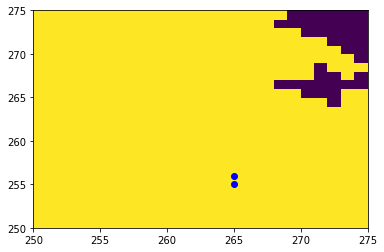

In [18]:
it = 2
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.tmask[0, 0])
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if ds.OilConcentration_2D[it, i, j] != 0:
#            print(i, j, ds.time[it].values, ds.OilConcentration_2D[it, i, j].values)
            plt.plot(j, i, 'bo')
        if ds.Beaching_Time[i, j] > ds.time[0].values and ds.Beaching_Time[i, j] <= ds.time[it].values:
#            print(i, j, ds.time[it].values, ds.Beaching_Time[i, j].values)
            plt.plot(j, i, 'rx')

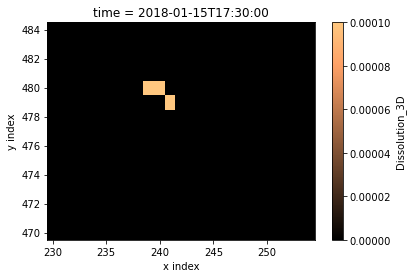

In [106]:
ds.Dissolution_3D[17, :, imin:imax, jmin:jmax].sum(axis=0).plot(cmap='copper')

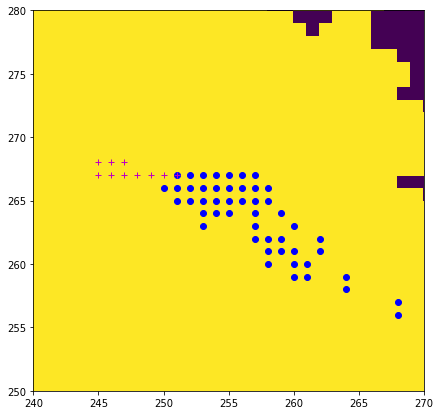

In [91]:
it = 18
imin, imax = 250, 280
jmin, jmax = 240, 270
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pcolormesh(mesh.tmask[0, 0])
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if ds.OilConcentration_2D[it, i, j] > 0.2:
#            print(i, j, ds.time[it].values, ds.OilConcentration_2D[it, i, j].values)
            plt.plot(j, i, 'bo')
        if ds.Beaching_Time[i, j] > ds.time[0].values and ds.Beaching_Time[i, j] <= ds.time[it].values:
#            print(i, j, ds.time[it].values, ds.Beaching_Time[i, j].values)
            plt.plot(j, i, 'rx')
        if ds.OilConcentration_3D[it, :, i, j].sum() > 0.1:
            plt.plot(j, i, 'm+')

(-10.0, 0.0)

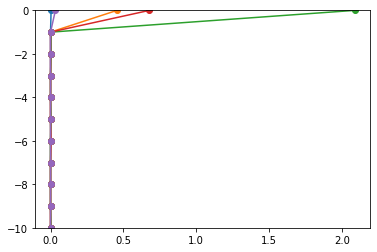

In [89]:
plt.plot(ds.OilConcentration_3D[it, :, 266, 250:255], -mesh.gdepw_1d[0, ::-1] , 'o-');
plt.ylim(-10, 0);

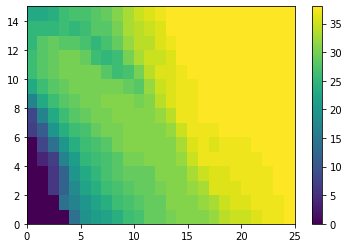

In [123]:
plt.pcolormesh(mesh.mbathy[0, imin:imax, jmin:jmax])
plt.colorbar();

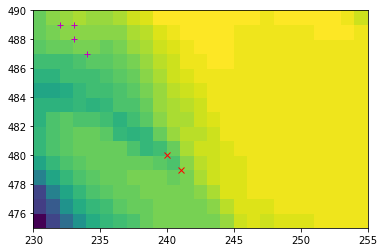

In [146]:
it = 20
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.mbathy[0])
imin, imax = 475, 490
jmin, jmax = 230, 255
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if ds.OilConcentration_2D[it, i, j] != 0:
#            print(i, j, ds.time[it].values, ds.OilConcentration_2D[it, i, j].values)
            plt.plot(j, i, 'bo')
        if ds.Beaching_Time[i, j] > ds.time[0].values and ds.Beaching_Time[i, j] <= ds.time[it].values:
#            print(i, j, ds.time[it].values, ds.Beaching_Time[i, j].values)
            plt.plot(j, i, 'rx')
        if ds.Dissolution_3D[it, :, i, j].sum() != 0:
            plt.plot(j, i, 'm+')

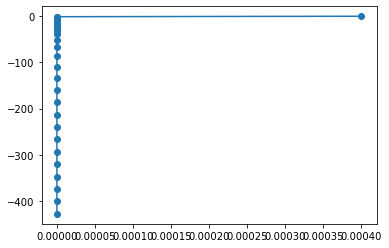

In [152]:
plt.plot(ds.Dissolution_3D[20, :, :, :].sum(axis=1).sum(axis=1), -mesh.gdepw_1d[0, ::-1], 'o-');

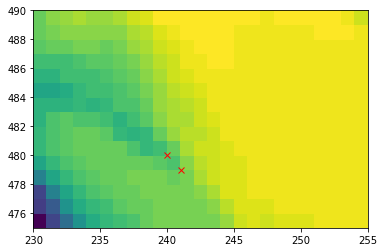

In [155]:
it = 20
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.mbathy[0])
imin, imax = 475, 490
jmin, jmax = 230, 255
ax.set_ylim(imin, imax)
ax.set_xlim(jmin, jmax)
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if ds.OilConcentration_2D[it, i, j] != 0:
#            print(i, j, ds.time[it].values, ds.OilConcentration_2D[it, i, j].values)
            plt.plot(j, i, 'bo')
        if ds.Beaching_Time[i, j] > ds.time[0].values and ds.Beaching_Time[i, j] <= ds.time[it].values:
#            print(i, j, ds.time[it].values, ds.Beaching_Time[i, j].values)
            plt.plot(j, i, 'rx')
        if ds.OilConcentration_3D[it, :, i, j].sum() != 0:
            plt.plot(j, i, 'm+')

In [3]:
list(hdf.keys())

['Grid', 'Results', 'Time']

In [11]:
list(hdf['Results'].keys())

['Group_1', 'Number', 'OilSpill', 'Percentage Contaminated']

In [26]:
list(hdf['Results']['OilSpill']['Data_2D'].keys())

['Beaching Time',
 'Beaching Volume',
 'Oil Arrival Time',
 'OilConcentration_2D',
 'Thickness_2D']

In [24]:
BV = hdf['Results']['OilSpill']['Data_2D']['Beaching Volume']['Beaching Volume_00191'][:]
print (BV.max(), BV.sum())

2988.221332146034 23186.377452579443


In [27]:
dset = hdf['Results']

In [28]:
OilSpill = dset['OilSpill']

In [29]:
OilSpill.keys()

<KeysViewHDF5 ['Beached', 'Data_2D', 'Data_3D', 'Freazed', 'Latitude', 'Latitude average', 'Longitude', 'Longitude average', 'Model ID', 'Origin ID', 'Particle State', 'Surface State', 'Thickness', 'Volume', 'X Pos', 'Y Pos', 'Z Pos', 'oil']>

In [98]:
OilSpill['oil']['oil_00100'][5]

1.0

In [93]:
print(np.array(OilSpill['Volume']['Volume_00001']).sum())
print(np.array(OilSpill['Volume']['Volume_00002']).sum())
print(np.array(OilSpill['Volume']['Volume_00005']).sum())
print(np.array(OilSpill['Volume']['Volume_00010']).sum())
print(np.array(OilSpill['Volume']['Volume_00020']).sum())
print(np.array(OilSpill['Volume']['Volume_00150']).sum())

1000.0
2721.92683305835
2969.9065364908465
3700.706849569166
3583.5208952447265
23186.377452579436


In [26]:
Xpos, Ypos, Zpos = OilSpill['X Pos'], OilSpill['Y Pos'], OilSpill['Z Pos']

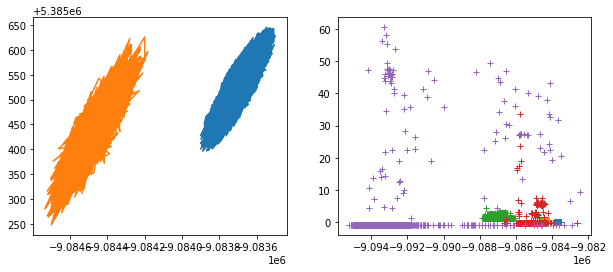

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(Xpos['X Position_00001'][:], Ypos['Y Position_00001']);
axs[0].plot(Xpos['X Position_00002'][:], Ypos['Y Position_00002']);
axs[1].plot(Xpos['X Position_00001'][:], Zpos['Z Position_00001'], '+')
axs[1].plot(Xpos['X Position_00002'][:], Zpos['Z Position_00002'], '+');
axs[1].plot(Xpos['X Position_00005'][:], Zpos['Z Position_00005'], '+');
axs[1].plot(Xpos['X Position_00010'][:], Zpos['Z Position_00010'], '+');
axs[1].plot(Xpos['X Position_00020'][:], Zpos['Z Position_00020'], '+');


1.0 1.0 2.0 2.0
1.7359286863328873 1.756633565258116 1.7875118665240224 1.7875118665240224 1.7875118665240224 1.7875118665240224
0.0
0.0
0.0
143.15198917198393
613.0
1212.1263948074986
778.0
1633.8117332375552
937.0
2092.8311814562553
1999.0
20198.1561204334
2000.0
23186.377452579436


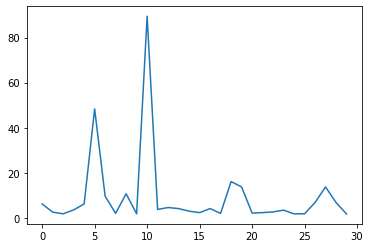

In [102]:
beach = OilSpill['Beached']
plt.plot(OilSpill['Volume']['Volume_00100'][20:50])
print (beach['Beached_00034'][22], beach['Beached_00035'][22], beach['Beached_00036'][22],beach['Beached_00037'][22])
print (OilSpill['Volume']['Volume_00034'][22], OilSpill['Volume']['Volume_00035'][22], 
       OilSpill['Volume']['Volume_00036'][22], OilSpill['Volume']['Volume_00037'][22],
      OilSpill['Volume']['Volume_00050'][22], OilSpill['Volume']['Volume_00100'][22])
print (((np.array(beach['Beached_00020'])-1) * np.array(OilSpill['Volume']['Volume_00020'])).sum())
print (((np.array(beach['Beached_00025'])-1) * np.array(OilSpill['Volume']['Volume_00025'])).sum())
print (((np.array(beach['Beached_00030'])-1) * np.array(OilSpill['Volume']['Volume_00030'])).sum())
print (((np.array(beach['Beached_00035'])-1) * np.array(OilSpill['Volume']['Volume_00035'])).sum())
print (((np.array(beach['Beached_00040'])-1).sum()))
print (((np.array(beach['Beached_00040'])-1) * np.array(OilSpill['Volume']['Volume_00040'])).sum())
print (((np.array(beach['Beached_00045'])-1).sum()))
print (((np.array(beach['Beached_00045'])-1) * np.array(OilSpill['Volume']['Volume_00045'])).sum())
print (((np.array(beach['Beached_00050'])-1).sum()))
print (((np.array(beach['Beached_00050'])-1) * np.array(OilSpill['Volume']['Volume_00050'])).sum())
print (((np.array(beach['Beached_00100'])-1).sum()))
print (((np.array(beach['Beached_00100'])-1) * np.array(OilSpill['Volume']['Volume_00100'])).sum())
print (((np.array(beach['Beached_00150'])-1).sum()))
print (((np.array(beach['Beached_00150'])-1) * np.array(OilSpill['Volume']['Volume_00150'])).sum())

1.0 1.7917604476223639
1.0 3.0459969727190566
1.0 4.565037337742477
1.0 8.374284442517059
2.0 11.953906790881833
2.0 11.953906790881833


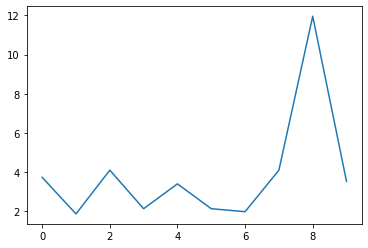

In [111]:
print (beach['Beached_00020'][8], OilSpill['Volume']['Volume_00020'][8])
print (beach['Beached_00050'][8], OilSpill['Volume']['Volume_00050'][8])
print (beach['Beached_00060'][8], OilSpill['Volume']['Volume_00060'][8])
print (beach['Beached_00065'][8], OilSpill['Volume']['Volume_00065'][8])
print (beach['Beached_00070'][8], OilSpill['Volume']['Volume_00070'][8])
print (beach['Beached_00100'][8], OilSpill['Volume']['Volume_00100'][8])
plt.plot(OilSpill['Volume']['Volume_00100'][0:10])

In [46]:
data2d = OilSpill['Data_2D']
data2d.keys()
print(data2d['Beaching Time']['Beaching Time_00001'][:].min())

0.0


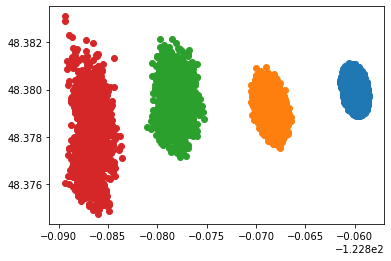

In [56]:
plt.plot(OilSpill['Longitude']['Longitude_00001'][:], OilSpill['Latitude']['Latitude_00001'][:], 'o')
plt.plot(OilSpill['Longitude']['Longitude_00002'][:], OilSpill['Latitude']['Latitude_00002'][:], 'o')
plt.plot(OilSpill['Longitude']['Longitude_00003'][:], OilSpill['Latitude']['Latitude_00003'][:], 'o')
plt.plot(OilSpill['Longitude']['Longitude_00004'][:], OilSpill['Latitude']['Latitude_00004'][:], 'o')

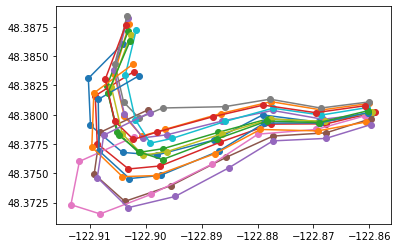

In [69]:
for mypoint in range(15):
    mylats = np.zeros((10, 1))
    mylons = np.zeros_like(mylats)
    for counter in range(1, 10):
        key1 = f'Longitude_0000{counter}'
        key2 = f'Latitude_0000{counter}'
        mylons[counter] =  OilSpill['Longitude'][key1][mypoint]
        mylats[counter] = OilSpill['Latitude'][key2][mypoint]
    plt.plot(mylons[1:], mylats[1:], 'o-')

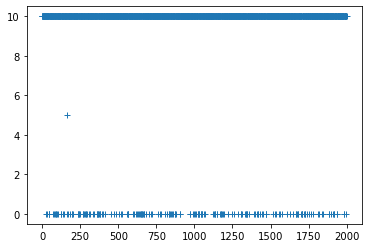

In [100]:
plt.plot(OilSpill['Particle State']['Particle State_00100'][:], '+')

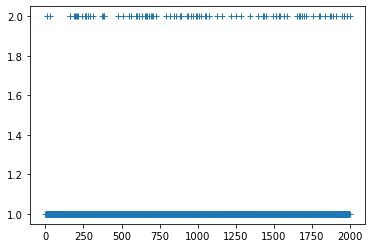

In [99]:
plt.plot(OilSpill['Surface State']['Surface State_00010'][:], '+')

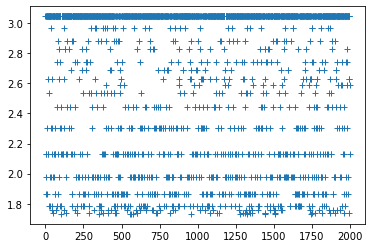

In [107]:
plt.plot(OilSpill['Volume']['Volume_00050'][:], '+')

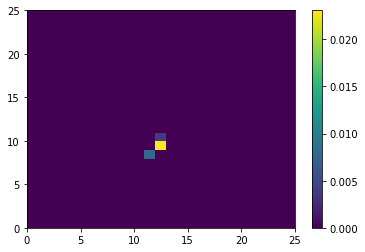

In [125]:
plt.pcolormesh(OilSpill['Data_3D']['OilConcentration_3D']['OilConcentration_3D_00010'][36].transpose()[250:275, 250:275])
plt.colorbar();

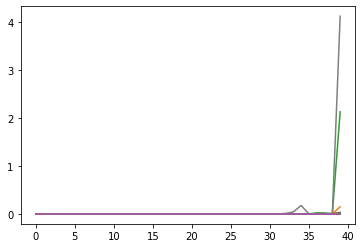

In [130]:
for i in range(259, 262):
    for j in range(260, 265):
        plt.plot(OilSpill['Data_3D']['OilConcentration_3D']['OilConcentration_3D_00010'][:, j, i])

In [156]:
print(OilSpill['Data_3D'].keys())

<KeysViewHDF5 ['Dissolution_3D', 'OilConcentration_3D']>


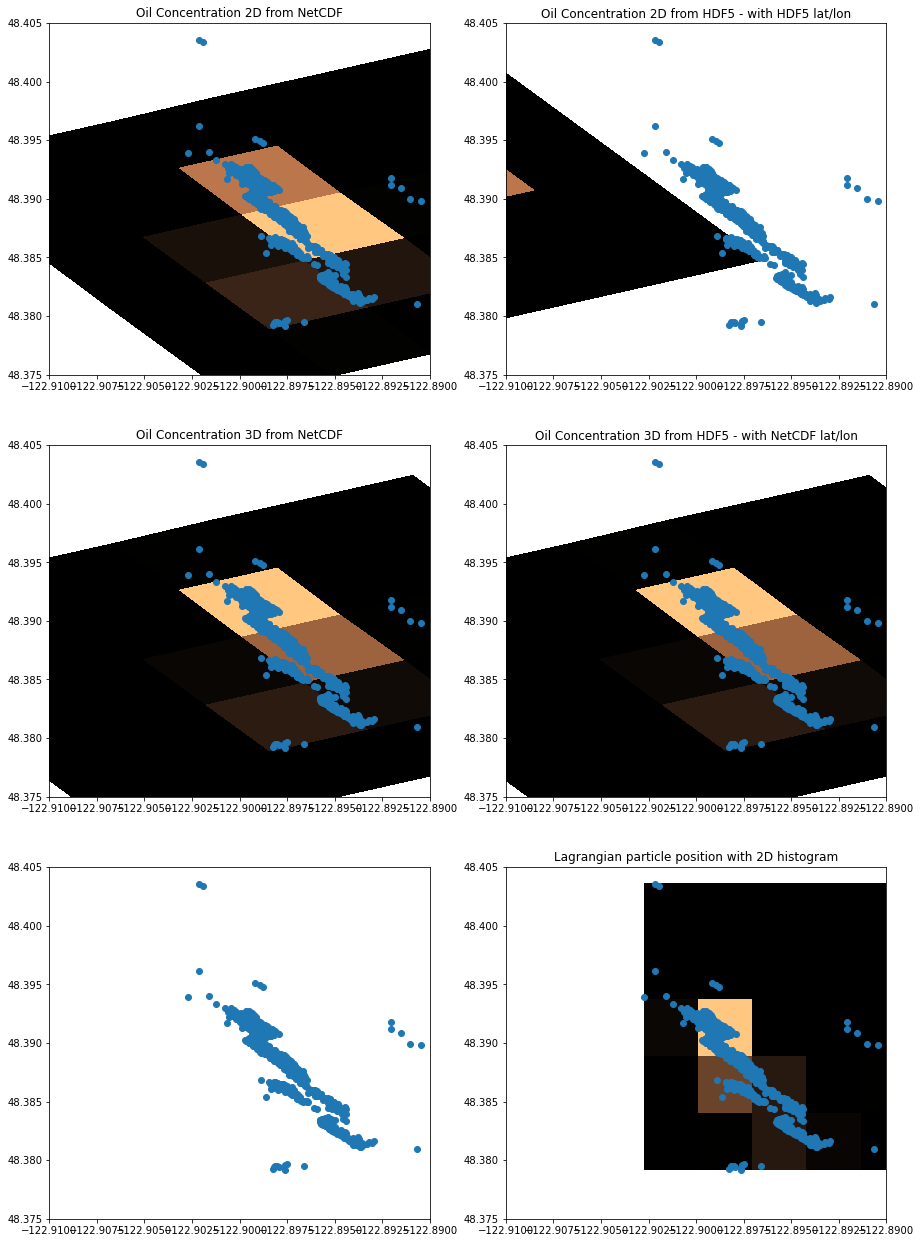

In [190]:
imin, imax = 257, 263
jmin, jmax = 259, 266
fig, axs = plt.subplots(3, 2, figsize=(15, 22))
it = 9
colour = axs[0, 0].pcolormesh(ds.Longitude[imin:imax, jmin+1:jmax+1], ds.Latitude[imin:imax, jmin+1:jmax+1], 
                        ds.OilConcentration_2D[it, imin:imax, jmin:jmax], cmap='copper')
colour = axs[0, 1].pcolormesh(hdf['Grid']['Longitude'][imin:imax, jmin:jmax], hdf['Grid']['Latitude'][imin:imax, jmin:jmax], 
                OilSpill['Data_2D']['Thickness_2D']['Thickness_2D_00010'][jmin:jmax, imin:imax].transpose(),
                    cmap='copper')
colour = axs[1, 0].pcolormesh(ds.Longitude[imin:imax, jmin:jmax], ds.Latitude[imin:imax, jmin:jmax], 
                        ds.OilConcentration_3D[it, :, imin:imax, jmin:jmax].sum(axis=0), cmap='copper')
colour = axs[1, 1].pcolormesh(ds.Longitude[imin:imax, jmin:jmax], ds.Latitude[imin:imax, jmin:jmax], 
                OilSpill['Data_3D']['OilConcentration_3D']['OilConcentration_3D_00010'][:, jmin:jmax, imin:imax].sum(axis=0).transpose(),
                    cmap='copper')
axs[2, 1].hist2d(OilSpill['Longitude']['Longitude_00010'][:], OilSpill['Latitude']['Latitude_00010'][:],
                cmap='copper', bins=5);

axs[0, 0].set_title('Oil Concentration 2D from NetCDF')
axs[0, 1].set_title('Oil Concentration 2D from HDF5 - with HDF5 lat/lon')
axs[1, 0].set_title('Oil Concentration 3D from NetCDF')
axs[1, 1].set_title('Oil Concentration 3D from HDF5 - with NetCDF lat/lon')
axs[2, 1].set_title('Lagrangian particle position with 2D histogram')

for i in range(3):
    for ax in axs[i]:
        ax.set_ylim(48.375, 48.405)
        ax.set_xlim(-122.91, -122.890)
        ax.plot(OilSpill['Longitude']['Longitude_00010'][:], OilSpill['Latitude']['Latitude_00010'][:], 'o');

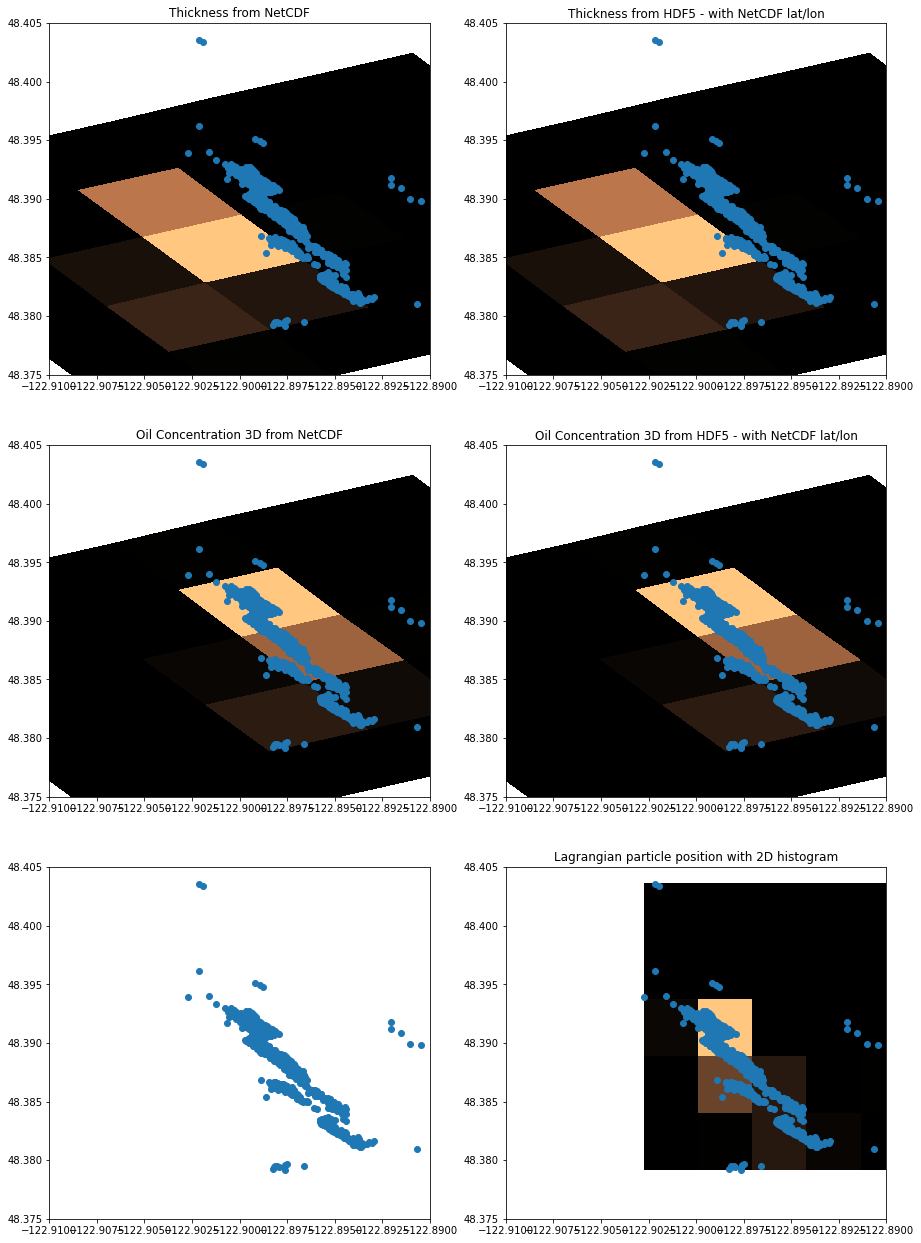

In [186]:
imin, imax = 257, 263
jmin, jmax = 259, 266
fig, axs = plt.subplots(3, 2, figsize=(15, 22))
it = 9
colour = axs[1, 0].pcolormesh(ds.Longitude[imin:imax, jmin:jmax], ds.[imin:imax, jmin:jmax], 
                        ds.OilConcentration_3D[it, :, imin:imax, jmin:jmax].sum(axis=0), cmap='copper')
colour = axs[1, 1].pcolormesh(ds.Longitude[imin:imax, jmin:jmax], ds.Latitude[imin:imax, jmin:jmax], 
                OilSpill['Data_3D']['OilConcentration_3D']['OilConcentration_3D_00010'][:, jmin:jmax, imin:imax].sum(axis=0).transpose(),
                    cmap='copper')
axs[2, 1].hist2d(OilSpill['Longitude']['Longitude_00010'][:], OilSpill['Latitude']['Latitude_00010'][:],
                cmap='copper', bins=5);

axs[0, 0].set_title('Thickness from NetCDF')
axs[0, 1].set_title('Thickness from HDF5 - with NetCDF lat/lon')
axs[1, 0].set_title('Oil Concentration 3D from NetCDF')
axs[1, 1].set_title('Oil Concentration 3D from HDF5 - with NetCDF lat/lon')
axs[2, 1].set_title('Lagrangian particle position with 2D histogram')

for i in range(3):
    for ax in axs[i]:
        ax.set_ylim(48.375, 48.405)
        ax.set_xlim(-122.91, -122.890)
        ax.plot(OilSpill['Longitude']['Longitude_00010'][:], OilSpill['Latitude']['Latitude_00010'][:], 'o');